In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir('/Users/jenna/c4sf/homeless/C4SF-datasci-homeless/processed/')
data = pd.read_csv('one_person_per_row_one_hot_v2.csv')
print data.columns
data.shape

## # of months homeless
## project type code

Index([u'Personal ID', u'living_situation_before_program_entry_foster',
       u'months_ago_dv_occurred',
       u'living_situation_before_program_entry_rental',
       u'dv_currently_fleeing',
       u'living_situation_before_program_entry_unknown', u'head_of_household',
       u'veteran_status', u'noncash_benefit_wic', u'gender_female',
       u'disability_type_alcohol', u'days_enrolled',
       u'housing_status_project_start_cat4fleeingdv',
       u'housing_status_project_start_cat1homeless', u'noncash_benefit_other',
       u'living_situation_before_program_entry_hospitalpsych',
       u'chronic_homeless', u'noncash_benefit_none', u'gender_transmtof',
       u'project_type_code_emergencyshelter',
       u'noncash_benefit_tanftransportation',
       u'living_situation_before_program_entry_permanenthousing',
       u'living_situation_before_program_entry_halfwayhouse',
       u'ethnicity_unknown', u'race_unknown', u'domestic_violence_victim',
       u'race_asian', u'disability_type_s

(11362, 89)

In [5]:
data_not1hot = pd.read_csv('2017-01-22_homeless_summary_categorical_string.csv')
print data_not1hot.columns
print data_not1hot.shape
print data_not1hot.head()

Index([u'Personal ID', u'chronic_homeless', u'client_age_at_entry',
       u'continuously_homeless_one_year', u'days_enrolled',
       u'days_to_residential_move_in', u'disabling_condition',
       u'domestic_violence_victim', u'dv_currently_fleeing', u'enrollments',
       u'ethnicity', u'gender', u'head_of_household',
       u'housing_status_project_start', u'in_permanent_housing',
       u'living_situation_before_program_entry', u'months_ago_dv_occurred',
       u'months_homeless_this_time', u'project_type_code', u'race',
       u'times_homeless_past_three_years', u'times_in_permanent_housing',
       u'transsexual', u'veteran_status', u'noncash_benefit_tanfother',
       u'noncash_benefit_wic', u'noncash_benefit_publichousing',
       u'noncash_benefit_temprental', u'noncash_benefit_other',
       u'noncash_benefit_tanftransportation', u'noncash_benefit_tanfchildcare',
       u'noncash_benefit_foodstamps', u'health_insurance_medicaid',
       u'health_insurance_statechild', u'healt

In [145]:
# avg age

avg_age_by_status = data_not1hot['client_age_at_entry'].groupby(data_not1hot['housing_status_project_start']).mean()
avg_age_by_status = avg_age_by_status.loc[['cat1homeless', 'cat2risklosing', 'unknown', 'housed', 'atrisk', 'cat3homelessfedstatutes', 'cat4fleeingdv']]

avg_age_by_status = avg_age_by_status.reset_index()
print avg_age_by_status.head()



  housing_status_project_start  client_age_at_entry
0                 cat1homeless            33.726163
1               cat2risklosing            29.400258
2                      unknown            38.663583
3                       housed            33.486705
4                       atrisk            34.293427


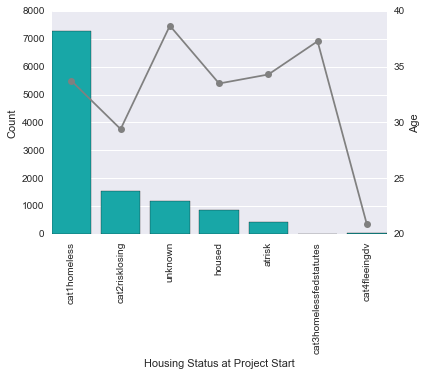

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.countplot(x='housing_status_project_start', data=data_not1hot, color='c')
plt.setp(p1.get_xticklabels(), rotation=90)
ax.set_ylabel('Count')
ax.set_xlabel('Housing Status at Project Start')

ax2 = ax.twinx()
ax2.grid(False)
ax2.plot(np.arange(7), avg_age_by_status['client_age_at_entry'], 'ko', color='gray')
ax2.plot(np.arange(7), avg_age_by_status['client_age_at_entry'], 'k-', color='gray')
ax2.set_ylabel('Age')

   housing_status          sum
6    cat1homeless  7244.037168
2  cat2risklosing  1576.991788
3         unknown  1271.795725
1          housed   772.449538
4          atrisk   455.138159


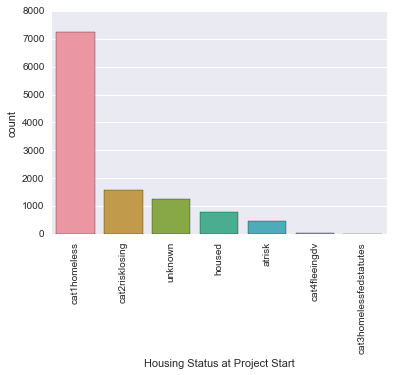

In [127]:
housing_status = ['housing_status_project_start_cat3homelessfedstatutes',
'housing_status_project_start_housed',
'housing_status_project_start_cat2risklosing',
'housing_status_project_start_unknown',
'housing_status_project_start_atrisk',
'housing_status_project_start_cat4fleeingdv',
'housing_status_project_start_cat1homeless']

housing_status_data = data[housing_status]

housing_status_totals = housing_status_data.sum(axis=0)
housing_status_totals = housing_status_totals.reset_index()

housing_status_totals.columns = ['housing_status', 'sum']
housing_status_totals = housing_status_totals.sort_values(by='sum', ascending=False)

def remove_text(text):
    text2 = text.split('housing_status_project_start_')[1]
    return text2

housing_status_totals['housing_status'] = housing_status_totals['housing_status'].apply(remove_text)



In [19]:
#print data_not1hot.columns

# atrisk = cat2risklosing + atrisk
# homeless = cat1homeless
atrisk_df = data_not1hot.ix[ data_not1hot['housing_status_project_start'].isin(['cat2risklosing', 'atrisk']) ]
homeless_df = data_not1hot.ix[ data_not1hot['housing_status_project_start'] == 'cat1homeless']

print atrisk_df.shape # N = 1975
print homeless_df.shape # N = 7289

atrisk_df['status'] = 0
homeless_df['status'] = 1

data_all = atrisk_df.append(homeless_df)
print data_all.shape
#print data_all.columns

features_quant = [
    'client_age_at_entry',
    'times_homeless_past_three_years',
    'months_homeless_this_time',
    'months_ago_dv_occurred',
    'days_enrolled',
    'days_to_residential_move_in',
]
quant = data_all[features_quant]
print quant.head()


(1975, 53)
(7289, 53)
(9264, 54)
    client_age_at_entry  times_homeless_past_three_years  \
15                   34                              1.0   
31                    9                              1.0   
32                   40                              0.0   
33                   59                              0.0   
35                   52                              NaN   

    months_homeless_this_time  months_ago_dv_occurred  days_enrolled  \
15                        1.0                     NaN            796   
31                        NaN                     6.0            462   
32                        0.0                     NaN           1682   
33                        NaN                     NaN              1   
35                        NaN                     NaN             18   

    days_to_residential_move_in  
15                          NaN  
31                          NaN  
32                          NaN  
33                          NaN  
35 

/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
#print data_not1hot.columns
# atrisk = cat2risklosing + atrisk
# homeless = cat1homeless
#print data.columns

homeless_df = data.ix[ data['housing_status_project_start_cat1homeless'] == 1 ]
atrisk_df = data.ix[ (data['housing_status_project_start_cat2risklosing'] == 1) | (data['housing_status_project_start_atrisk'] == 1)]

print atrisk_df.shape   # N = 1849
print homeless_df.shape # N = 6822

atrisk_df['status_start_homeless'] = 0
homeless_df['status_start_homeless'] = 1

data_all = atrisk_df.append(homeless_df)
print data_all['status_start_homeless'].tail()



(1849, 89)
(6822, 89)
11343    1
11344    1
11345    1
11346    1
11347    1
Name: status_start_homeless, dtype: int64


/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jenna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# create test and train sets and run the logistic!

from sklearn.cross_validation import train_test_split
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

X = data.drop('is_converted', 1).values
y = data['is_converted'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print X_train, X_train.shape

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [28]:
X = data_all.drop('status_start_homeless', 1).values
y = data_all['status_start_homeless'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print X_train, X_train.shape
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

[[  2.78142000e+05   0.00000000e+00              nan ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.82808000e+05   0.00000000e+00              nan ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.53247000e+05   0.00000000e+00   1.20000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.55026000e+05   0.00000000e+00              nan ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.53252000e+05   0.00000000e+00              nan ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.73566000e+05   0.00000000e+00   3.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]] (6936, 89)
(6936, 89) (1735, 89)
(6936,) (1735,)


In [33]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()
result = clf.fit(X_train, y_train)
    # remove NaN
print result


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [32]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
result = logit.fit()

ValueError: On entry to DLASCL parameter number 5 had an illegal value

     living_sit          sum
2        rental  1917.229754
14       family  1587.260598
0   emershelter  1453.385737
3       unknown   940.009986
10       friend   851.402404


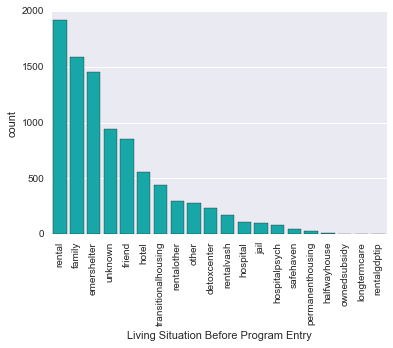

In [148]:
living_situations = ['living_situation_before_program_entry_emershelter',
'living_situation_before_program_entry_other',
'living_situation_before_program_entry_rental',
'living_situation_before_program_entry_unknown',
'living_situation_before_program_entry_hospitalpsych',
'living_situation_before_program_entry_permanenthousing',
'living_situation_before_program_entry_halfwayhouse',
'living_situation_before_program_entry_hospital',
'living_situation_before_program_entry_safehaven',
'living_situation_before_program_entry_rentalvash',
'living_situation_before_program_entry_friend',
'living_situation_before_program_entry_rentalother',
'living_situation_before_program_entry_ownedsubsidy',
'living_situation_before_program_entry_hotel',
'living_situation_before_program_entry_family',
'living_situation_before_program_entry_detoxcenter',
'living_situation_before_program_entry_jail',
'living_situation_before_program_entry_transitionalhousing',
'living_situation_before_program_entry_longtermcare',
'living_situation_before_program_entry_rentalgdptip']

living_sit_data = data[living_situations]

living_sit_totals = living_sit_data.sum(axis=0)
living_sit_totals = living_sit_totals.reset_index()

living_sit_totals.columns = ['living_sit', 'sum']
living_sit_totals = living_sit_totals.sort_values(by='sum', ascending=False)

def remove_text(text):
    text2 = text.split('living_situation_before_program_entry_')[1]
    return text2

living_sit_totals['living_sit'] = living_sit_totals['living_sit'].apply(remove_text)

print living_sit_totals.head()

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.barplot(x='living_sit', y='sum', data=living_sit_totals, color='c')
plt.setp(p1.get_xticklabels(), rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('Living Situation Before Program Entry')

In [42]:
print data['dv_currently_fleeing'].head()
data.ix[ data['dv_currently_fleeing'] == 1 ].shape

print data['in_permanent_housing'].head()
data.ix[ data['in_permanent_housing'] ==1 ].shape

0    0
1    0
2    0
3    0
4    0
Name: dv_currently_fleeing, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: in_permanent_housing, dtype: int64


(1148, 89)

In [4]:
features_quant = [
    'client_age_at_entry',
    'times_homeless_past_three_years',
    'months_homeless_this_time',
    'months_ago_dv_occurred',
    'days_enrolled',
    'days_to_residential_move_in',
]
quant = data[features_quant]
quant.head()

,client_age_at_entry,times_homeless_past_three_years,months_homeless_this_time,months_ago_dv_occurred,days_enrolled,days_to_residential_move_in
0,35,2.0,NaN,12.0,147,NaN
1,10,2.0,NaN,12.0,147,NaN
2,12,2.0,NaN,12.0,147,NaN
3,32,NaN,NaN,12.0,78,NaN
4,11,NaN,NaN,NaN,78,NaN


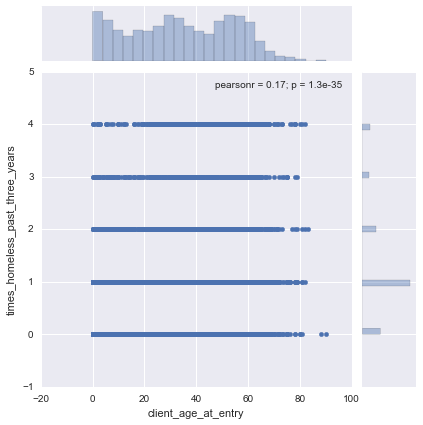

In [5]:
sns.jointplot('client_age_at_entry', 'times_homeless_past_three_years', data = quant)

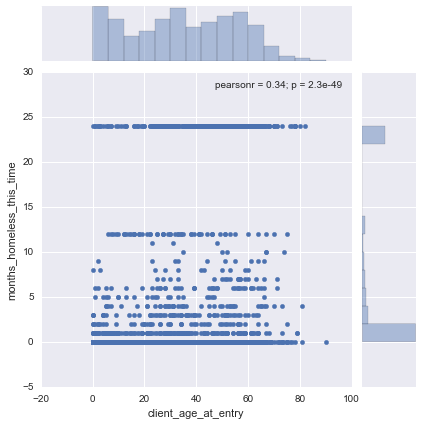

In [6]:
sns.jointplot('client_age_at_entry', 'months_homeless_this_time', data = quant)

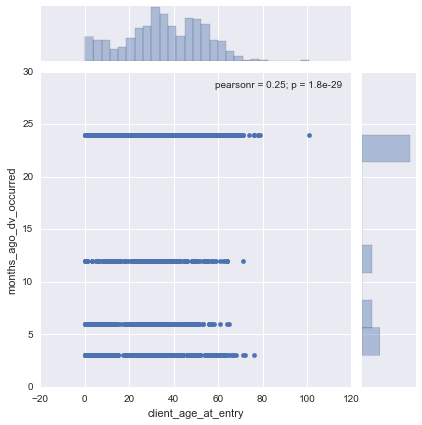

In [7]:
sns.jointplot('client_age_at_entry', 'months_ago_dv_occurred', data = quant)

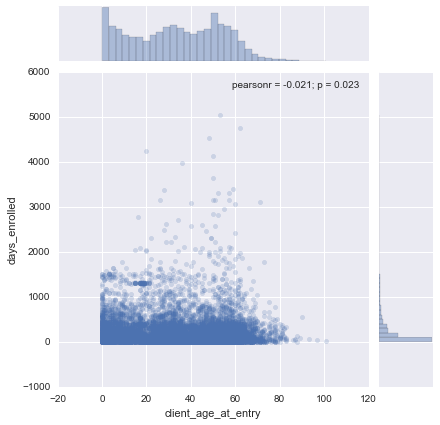

In [8]:
sns.jointplot('client_age_at_entry', 'days_enrolled', data = quant, alpha=0.2)

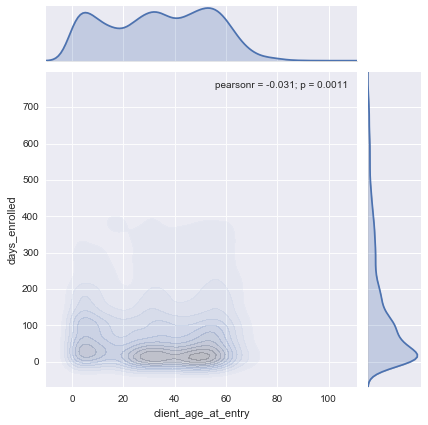

In [9]:
quant_sub = quant.ix[quant['days_enrolled'] < (365*2)]
sns.jointplot('client_age_at_entry', 'days_enrolled', kind='kde', data=quant_sub, alpha=0.2)

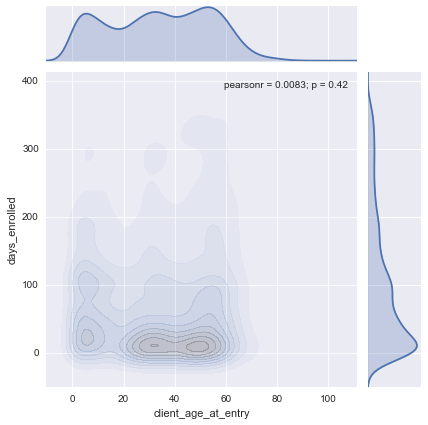

In [10]:
quant_sub = quant.ix[quant['days_enrolled'] < 365]
sns.jointplot('client_age_at_entry', 'days_enrolled', kind='kde', data=quant_sub, alpha=0.2)

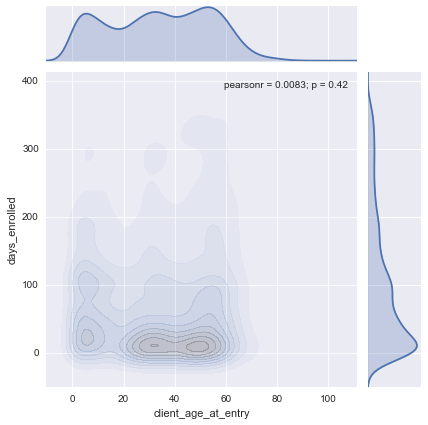

In [13]:
## Distribution of everyone with enrollments < 365

data_sub = data.ix[ data['days_enrolled'] < 365 ]
sns.jointplot('client_age_at_entry', 'days_enrolled', kind='kde', data=data_sub, alpha=0.2)

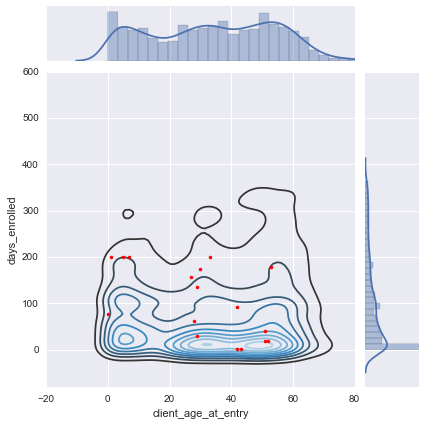

In [53]:
## Currently fleeing domestic violence

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 600))
#g.plot_joint(plt.scatter, color='c')
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot)
temp = data_sub.ix[ data_sub['dv_currently_fleeing']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'r.')
    

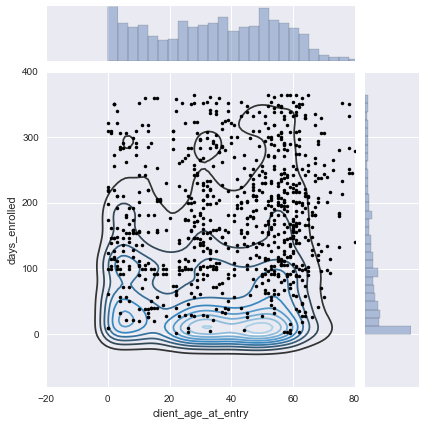

In [55]:
## In Permanent Housing

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data_sub.ix[ data_sub['in_permanent_housing']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')

## --> People in permanent housing are older than the general population of homeless people.
## --> People in permanent housing have been enrolled for longer than the general population.

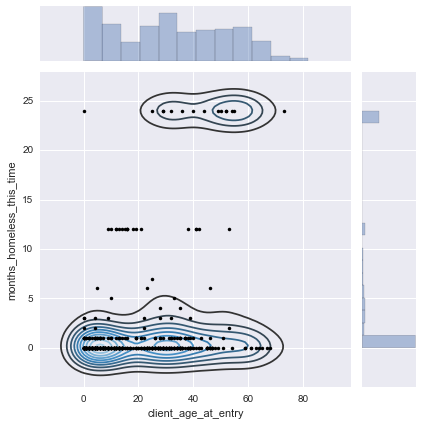

In [81]:
## Months homeless this time vs. Age -- Services Only

g = sns.JointGrid(x="client_age_at_entry", y="months_homeless_this_time", data=data_sub)#, \
                 # xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data_sub.ix[ data_sub['project_type_code_servicesonly']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['months_homeless_this_time'], 'k.')


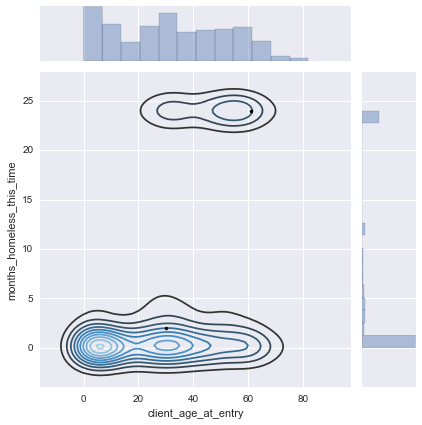

In [83]:
## Months homeless this time vs. Age -- Permanent Supportive Housing

g = sns.JointGrid(x="client_age_at_entry", y="months_homeless_this_time", data=data_sub)#, \
                 # xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data_sub.ix[ data_sub['project_type_code_permanentsupportivehousing']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['months_homeless_this_time'], 'k.')


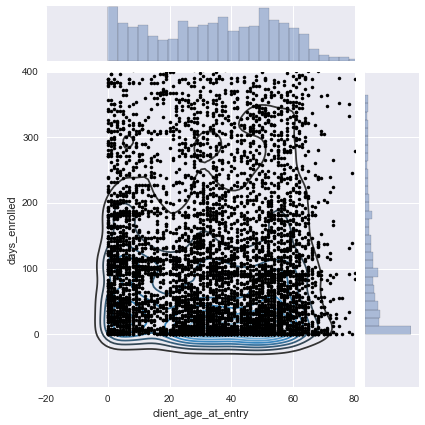

In [79]:
## Homeless at project start

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data.ix[ data['housing_status_project_start_cat1homeless']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')

    

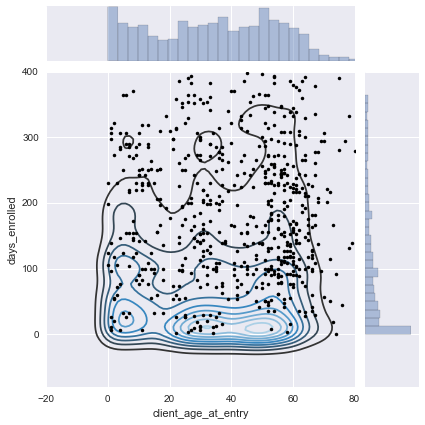

In [85]:
## Rapid Rehousing

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data.ix[ data['project_type_code_rapidrehousing']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')

## People who receive rapid rehousing are older and were enrolled for longer    

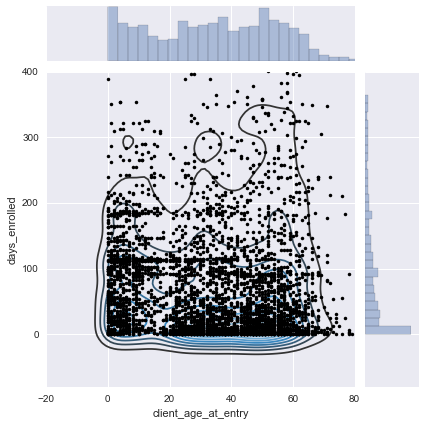

In [86]:
## Emergency Shelter

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data.ix[ data['project_type_code_emergencyshelter']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')

## Many people go to emergency shelters.  Weighted towards people who are enrolled for a short amount of time
## and children

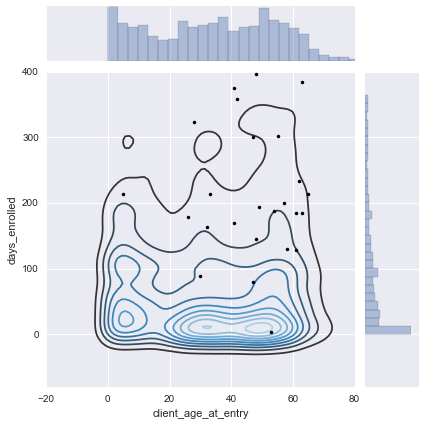

In [87]:
## project_type_code_permanentsupportivehousing


g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data.ix[ data['project_type_code_permanentsupportivehousing']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')

## People who receive permanent supportive housing are older and have been enrolled longer.

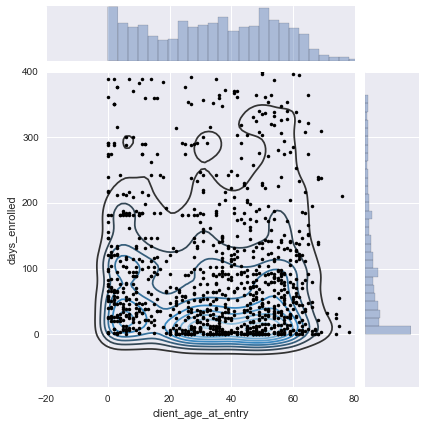

In [80]:
## In emergency shelter at project start

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=data_sub, \
                  xlim=(-20, 80), ylim=(-80, 400))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)
temp = data.ix[ data['living_situation_before_program_entry_emershelter']==1 ]
g.ax_joint.plot(temp['client_age_at_entry'], temp['days_enrolled'], 'k.')


## --> Distribution of people who start out in emergency shelter mimics the total population

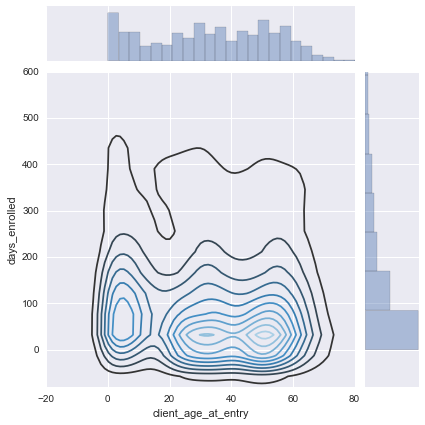

In [75]:
## Housing_status_project_start_cat1homeless

perm = data.ix[ data['housing_status_project_start_cat1homeless']==1 ]

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=perm, \
                  xlim=(-20, 80), ylim=(-80, 600))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)

## --> Distribution of people who are homeless at project start mimics general population

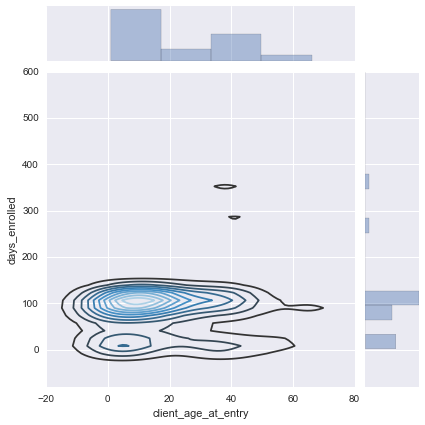

In [76]:
## housing_status_project_start_cat4fleeingdv

perm = data.ix[ data['housing_status_project_start_cat4fleeingdv']==1 ]

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=perm, \
                  xlim=(-20, 80), ylim=(-80, 600))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)

## --> Distribution of people fleeing domestic violence at project start have a wide range of 
## ages and have been enrolled for 100 days (?)

(1158, 89)


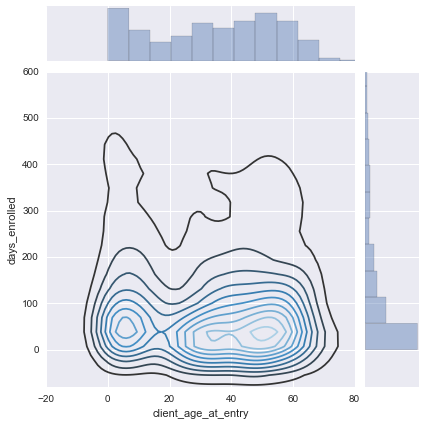

In [78]:
## living_situation_before_program_entry_emershelter

perm = data.ix[ data['living_situation_before_program_entry_emershelter']==1 ]

print perm.shape

g = sns.JointGrid(x="client_age_at_entry", y="days_enrolled", data=perm, \
                  xlim=(-20, 80), ylim=(-80, 600))
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.distplot, kde=False)

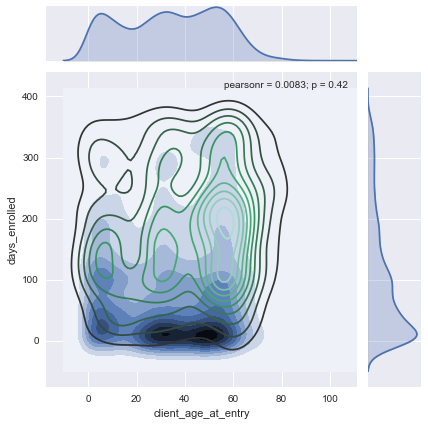

In [65]:
data_sub = data.ix[ data['days_enrolled'] < 365 ]

graph = sns.jointplot(x = data_sub['client_age_at_entry'], y = data_sub['days_enrolled'], \
                      kind='kde')#, color='r')

#graph = plot_joint(x = data_sub['client_age_at_entry'], y = data_sub['days_enrolled'], \
#                      kind='kde')

graph.x = temp['client_age_at_entry']
graph.y = temp['days_enrolled']
graph.plot_joint(sns.kdeplot)#, cmap='Blues')

## Trying to overlay full population with people who end up in permanent housing


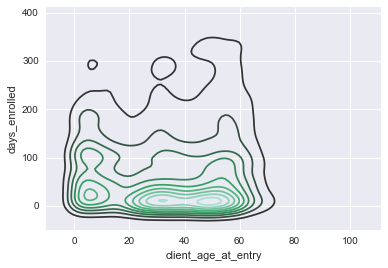

In [74]:
fig, ax = plt.subplots()
sns.kdeplot(data_sub['client_age_at_entry'], data_sub['days_enrolled'], ax=ax, color='blue')
#sns.kdeplot(temp['client_age_at_entry'], temp['days_enrolled'], ax=ax, color='o')

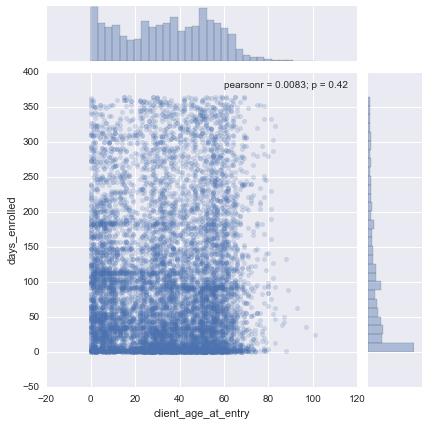

In [95]:
quant_sub = quant.ix[quant['days_enrolled'] < 365]
sns.jointplot('client_age_at_entry', 'days_enrolled', data=quant_sub, alpha=0.2)

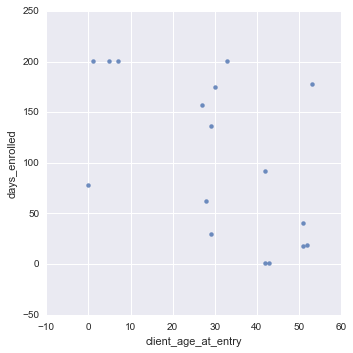

In [101]:
#a=sns.jointplot(x="volatility", y="return", data=data, size=10)
#a.ax_joint.plot([0.2],[0.2],'ro')
#sns.lmplot("x", "y", data=df, hue='dataset', fit_reg=False)

quant_sub = quant.ix[quant['days_enrolled'] < 365]
#a = sns.jointplot('client_age_at_entry', 'days_enrolled', kind='kde', data=quant_sub, alpha=0.2)
sns.lmplot('client_age_at_entry', 'days_enrolled', data=data.ix[ (data['days_enrolled']<365) \
                                                                                  & (data['dv_currently_fleeing']==1)], fit_reg=False)

In [86]:
print quant.head()

   client_age_at_entry  times_homeless_past_three_years  \
0                   35                              2.0   
1                   10                              2.0   
2                   12                              2.0   
3                   32                              NaN   
4                   11                              NaN   

   months_homeless_this_time  months_ago_dv_occurred  days_enrolled  \
0                        NaN                    12.0            147   
1                        NaN                    12.0            147   
2                        NaN                    12.0            147   
3                        NaN                    12.0             78   
4                        NaN                     NaN             78   

   days_to_residential_move_in  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  


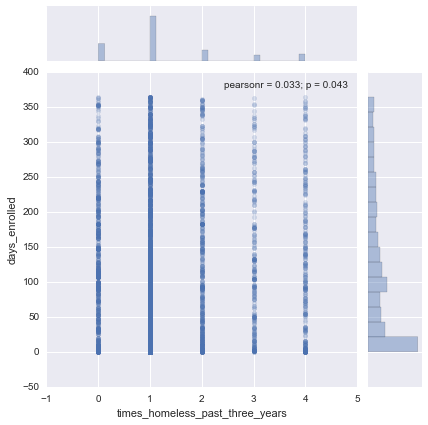

In [87]:
quant_sub = quant.ix[quant['days_enrolled'] < 365]
sns.jointplot('times_homeless_past_three_years', 'days_enrolled', data=quant_sub, alpha=0.2)

In [89]:
#quant_sub = quant.ix[quant['days_enrolled'] < 365]
sns.jointplot('client_age_at_entry', 'days_enrolled', color=disability_type_hivaids, data=data, alpha=0.2)

NameError: name 'disability_type_hivaids' is not defined

In [36]:
data = pd.read_csv('homeless_3_projects_outcome.csv')  ## enrolled 3 or fewer times
print data.columns 
print data.shape
print data['Personal ID'].nunique()

Index([u'Personal ID', u'race', u'ethnicity', u'gender', u'veteran_status',
       u'project_entry_id', u'client_age_at_entry', u'entry_date',
       u'housing_status_project_start', u'project_1', u'project_2',
       u'project_3', u'in_permanent_housing'],
      dtype='object')
(9402, 13)
9402


In [42]:
data[['race', 'ethnicity', 'gender', 'veteran_status', 'client_age_at_entry', 'housing_status_project_start', 'project_1', 'project_2', 'project_3']]

,race,ethnicity,gender,veteran_status,client_age_at_entry,housing_status_project_start,project_1,project_2,project_3
0,White,Hispanic/Latino,Female,False,34,At-risk of homelessness,Street Outreach,Emergency Shelter,NaN
1,White,Hispanic/Latino,Male,False,10,Category 1 - Homeless,Emergency Shelter,NaN,NaN
2,White,Hispanic/Latino,Female,False,12,Category 1 - Homeless,Emergency Shelter,NaN,NaN
3,White,Hispanic/Latino,Female,False,32,Category 1 - Homeless,Emergency Shelter,NaN,NaN
4,White,Hispanic/Latino,Female,False,11,Category 1 - Homeless,Emergency Shelter,NaN,NaN
5,White,Hispanic/Latino,Female,False,10,Category 1 - Homeless,Emergency Shelter,NaN,NaN
6,White,Non-Hispanic/Non-Latino,Female,False,10,Category 1 - Homeless,Emergency Shelter,NaN,NaN
7,Black or African American,Non-Hispanic/Non-Latino,Female,False,28,Category 1 - Homeless,Emergency Shelter,Services Only,Services Only
8,Black or African American,Non-Hispanic/Non-Latino,Male,False,9,Category 1 - Homeless,Services Only,Services Only,NaN
9,Unknown,Hispanic/Latino,Female,False,34,Category 1 - Homeless,Emergency Shelter,Emergency Shelter,NaN


In [23]:
os.chdir('/Users/jenna/c4sf/homeless/')
data = pd.read_csv('homeless_row_per_enrollment.csv')
data.head()
data.columns

Index([u'Personal ID', u'race', u'ethnicity', u'gender', u'veteran_status',
       u'project_entry_id', u'client_age_at_entry', u'last_permanent_zip',
       u'entry_date', u'exit_date', u'project_id',
       u'housing_status_project_start',
       u'living_situation_before_program_entry', u'client_location',
       u'household_id', u'disabling_condition',
       u'continuously_homeless_one_year', u'times_homeless_past_three_years',
       u'months_homeless_this_time', u'chronic_homeless',
       u'in_permanent_housing', u'residential_move_in_date',
       u'domestic_violence_victim', u'months_ago_dv_occurred',
       u'dv_currently_fleeing', u'days_enrolled',
       u'days_to_residential_move_in', u'head_of_household',
       u'noncash_benefit', u'disability_type', u'project_name',
       u'project_type_code', u'address_city', u'address_postal_code'],
      dtype='object')

In [ ]:
data[['days_to_residential_move_in', 'times_homeless_past_three_years', 'months_homeless_this_time']]

In [43]:
to_plot = data[['race', 'gender']]

In [25]:
data[['race', 'gender', 'ethnicity', 'veteran_status', 'client_age_at_entry', 'housing_status_project_start']]

,race,gender,ethnicity,veteran_status,client_age_at_entry,housing_status_project_start
0,White,Male,Non-Hispanic/Non-Latino,False,60,Category 1 - Homeless
1,White,Male,Non-Hispanic/Non-Latino,True,53,Category 1 - Homeless
2,White,Female,Hispanic/Latino,False,50,Category 1 - Homeless
3,White,Male,Hispanic/Latino,False,28,Category 1 - Homeless
4,Black or African American,Male,Non-Hispanic/Non-Latino,False,48,Category 1 - Homeless
5,White,Male,Non-Hispanic/Non-Latino,False,46,Category 2 - At imminent risk of losing housing
6,White,Male,Non-Hispanic/Non-Latino,False,46,Category 2 - At imminent risk of losing housing
7,White,Male,Non-Hispanic/Non-Latino,False,28,Category 1 - Homeless
8,White,Male,Non-Hispanic/Non-Latino,False,28,Category 1 - Homeless
9,White,Male,Hispanic/Latino,True,30,Category 2 - At imminent risk of losing housing


In [28]:
data[['living_situation_before_program_entry', 'disabling_condition', 'chronic_homeless', 'domestic_violence_victim', 'disability_type', 'project_name']]

,living_situation_before_program_entry,disabling_condition,chronic_homeless,domestic_violence_victim,disability_type,project_name
0,Hotel or motel paid for without emergency shel...,True,False,False,Physical,SCz - HSC - Page Smith Community House
1,"Staying or living in a family member's room, a...",True,False,False,Mental Health Problem,MOSBE Veterans Transition Center - Outreach
2,Place not meant for habitation,False,False,False,None,MOSBE The Salvation Army - Good Samaritan Center
3,Place not meant for habitation,False,False,False,None,MOSBE The Salvation Army - Good Samaritan Center
4,"Emergency shelter, including hotel or motel pa...",False,False,False,None,MOSBE The Salvation Army - Good Samaritan Center
5,"Staying or living in a family member's room, a...",True,False,False,Both Alcohol and Drug Abuse,MOSBE Interim - MCHOME Outreach
6,"Staying or living in a family member's room, a...",True,False,False,Both Alcohol and Drug Abuse,MOSBE Interim - MCHOME Outreach
7,Transitional housing for homeless persons (inc...,True,False,True,Both Alcohol and Drug Abuse,MOSBE Interim - Sandy Shores
8,Transitional housing for homeless persons (inc...,True,False,True,Both Alcohol and Drug Abuse,MOSBE Interim - Sandy Shores
9,"Staying or living in a family member's room, a...",True,False,False,Mental Health Problem,MOSBE Veterans Transition Center - Outreach


In [30]:
print data.shape
data['Personal ID'].nunique()

(58209, 34)


11362